<a href="https://colab.research.google.com/github/MajedKawa/Market-Basket-Analysis/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install apyori  #This installs the Apyori package for using the Association Mining Apriori algorithm

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from apyori import apriori

In [2]:
df = pd.read_csv('Groceries_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


There are no NaN values in the data.

In [3]:
df.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [4]:
# Group by Member_number and Date to create transactions
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index() # This transformation helps in analyzing what items each member purchased on a given date.
print(transactions[:5])
# Drop unnecessary columns
transactions = transactions['itemDescription']

# Convert transactions to a list of lists
transaction_list = transactions.tolist()

# Display the first few transactions
print(transaction_list[:5])

   Member_number        Date  \
0           1000  15-03-2015   
1           1000  24-06-2014   
2           1000  24-07-2015   
3           1000  25-11-2015   
4           1000  27-05-2015   

                                     itemDescription  
0  [sausage, whole milk, semi-finished bread, yog...  
1                  [whole milk, pastry, salty snack]  
2                     [canned beer, misc. beverages]  
3                        [sausage, hygiene articles]  
4                         [soda, pickled vegetables]  
[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'], ['whole milk', 'pastry', 'salty snack'], ['canned beer', 'misc. beverages'], ['sausage', 'hygiene articles'], ['soda', 'pickled vegetables']]


In [5]:
# Apply Apriori algorithm
rules = apriori(transaction_list, min_support=0.001, min_confidence=0.02, min_lift=1.5, min_length=2)

results = list(rules)

# Display the results
print("\nAssociation Rules:")
for result in results:
    items = [item for item in result.items]
    antecedents = items[:-1]
    consequents = items[-1]
    support = result.support
    confidence = result.ordered_statistics[0].confidence
    lift = result.ordered_statistics[0].lift

    print(f"Rule: {antecedents} -> {consequents}")
    print(f"Support: {support:.3f}, Confidence: {confidence:.3f}, Lift: {lift:.3f}")
    print("------")


Association Rules:
Rule: ['beverages'] -> sausage
Support: 0.002, Confidence: 0.093, Lift: 1.537
------
Rule: ['specialty chocolate'] -> citrus fruit
Support: 0.001, Confidence: 0.026, Lift: 1.654
------
Rule: ['flour'] -> tropical fruit
Support: 0.001, Confidence: 0.110, Lift: 1.617
------
Rule: ['pastry'] -> napkins
Support: 0.002, Confidence: 0.079, Lift: 1.519
------
Rule: ['root vegetables'] -> processed cheese
Support: 0.001, Confidence: 0.105, Lift: 1.513
------
Rule: ['soda', 'sausage'] -> whole milk
Support: 0.001, Confidence: 0.092, Lift: 1.524
------
Rule: ['whole milk', 'yogurt'] -> sausage
Support: 0.001, Confidence: 0.024, Lift: 2.183
------


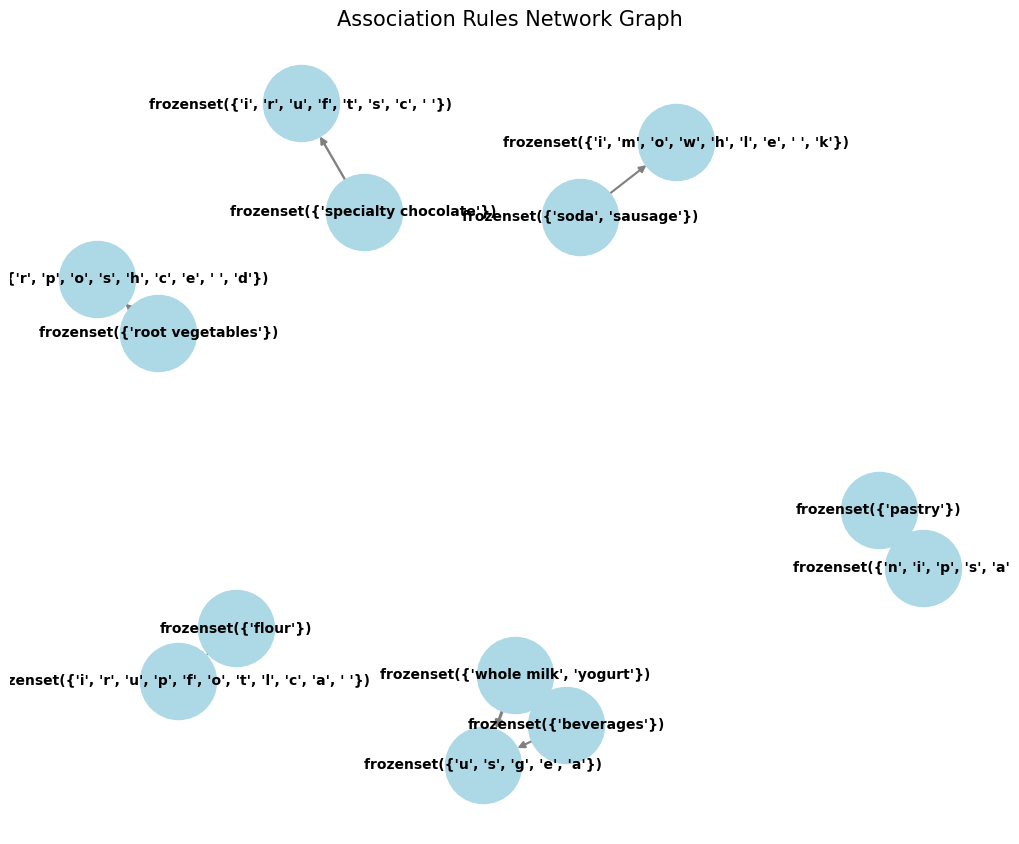

In [6]:
# Create a directed graph
G = nx.DiGraph()

# Add edges and nodes based on the rules
for record in results:
    items = [item for item in record.items]
    antecedents = items[:-1]
    consequents = items[-1]
    support = record.support
    confidence = record.ordered_statistics[0].confidence
    lift = record.ordered_statistics[0].lift

    # Add edge to the graph
    G.add_edge(frozenset(antecedents), frozenset(consequents), weight=lift, support=support, confidence=confidence)

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', width=[G[u][v]['weight'] for u, v in G.edges()])
plt.title("Association Rules Network Graph", fontsize=15)
plt.show()